<a href="https://colab.research.google.com/github/buihanhtrang/NCKH_UTG_2024/blob/master/liverpt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statistics

sns.set_style("whitegrid")
sns.set_palette("RdBu")

In [ ]:
data = pd.read_csv('/kaggle/input/bmeliver/DataSubClinicalLiver.csv')
#data["A4. Giới tính:"] = data["A4. Giới tính:"].replace({'Nam' : 1, 'Nữ' : 2})
data["D3. Triệu chứng chuyển hóa"] = data["D3. Triệu chứng chuyển hóa: Một bệnh nhân được xác định là có hội chứng chuyển hóa nếu đã được chẩn đoán và đang được điều trị tiểu đường hoặc tăng mỡ máu/ hoặc có bất kỳ 3 trong các biểu hiện sau đây: [1] Béo phì trung tâm (vòng eo ≥ 90cm ở nam và ≥ 80cm ở nữ) [2] Triglycerides > 1,7mmol/L [3] Giảm HDL-C (< 1,03 mmol/l ở nam và < 1,29mmol/l ở nữ) [4] Huyết áp ≥ 130 / 85 mmHg [5] Đường huyết lúc đói ≥ 5,6mmol/L"].replace({'Có' : 1, 'Không': 0})

In [ ]:
raw_apri = data["APRI"]
clean_apri = raw_apri.dropna()
raw_ast_alt = data["Tỷ lệ AST / ALT"]
clean_ast_alt = raw_ast_alt.dropna()
raw_fib4 = data["FIB-4 "]
clean_fib4 = raw_fib4.dropna()
raw_nfs = data["NFS"]
clean_nfs = raw_nfs.dropna()
raw_bard = data["BARD"]
clean_bard = raw_bard.dropna()
raw_tcch = data["D3. Triệu chứng chuyển hóa"]
clean_tcch = raw_tcch.dropna()
raw_alphaFP = data["Alpha FP:"]
clean_alphaFP = raw_alphaFP.dropna()
raw_hdlc = data["HDLC"]
clean_hdlc = raw_hdlc.dropna()
raw_tri = data["Triglyceride:"]
clean_tri = raw_tri.dropna()
raw_albumin = data["Albumin:"]
clean_albumin = raw_albumin.dropna()
raw_biltd = data["Bil tự do:"]
clean_biltd = raw_biltd.dropna()
raw_biltp = data["Bil toàn phần:"]
clean_biltp = raw_biltp.dropna()
raw_ggt = data["GGT:"]
clean_ggt = raw_ggt.dropna()
raw_alt = data["ALT:"]
clean_alt = raw_alt.dropna()
raw_ast = data["AST:"]
clean_ast = raw_ast.dropna()
raw_inr = data["INR:"]
clean_inr = raw_inr.dropna()
raw_tc = data["TIểu cầu:"]
clean_tc = raw_tc.dropna()

In [ ]:
def countplot(column_name, rotation=0):
    plt.figure(figsize=(15,6))
    sns.countplot(data=data, x=column_name)
    plt.xticks(rotation=rotation)
    plt.show()

def boxplot(column_name):
    fig,ax=plt.subplots(1,2,figsize=(15,4))
    sns.boxplot(data=data, x=column_name.name, ax=ax[0])
    sns.histplot(data=data, x=column_name.name, bins=4, ax=ax[1])
    ax[0].set_title(column_name.name)
    ax[1].set_title(column_name.name)
    plt.show()

def scatterplot(column_name):
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    sns.scatterplot(data=data, x=column_name.name, ax=ax[0])
    sns.histplot(data=data, x=column_name.name, bins=4, ax=ax[1])
    ax[0].set_title(column_name.name)
    ax[1].set_title(column_name.name)
    plt.show()

def distribution(column_name):
    Q1 = data[column_name.name].quantile(0.25)
    Q3 = data[column_name.name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = data[(data[column_name.name] >= lower_bound) & (data[column_name.name] <= upper_bound)]

    plt.figure(figsize=(7, 4))
    sns.kdeplot(data=filtered_data, x=column_name.name)

    n = len(filtered_data)

    plt.title(f"{column_name.name} (n={n})")

    plt.show()


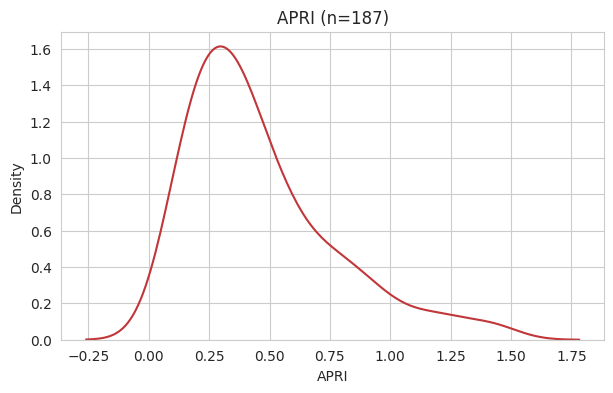

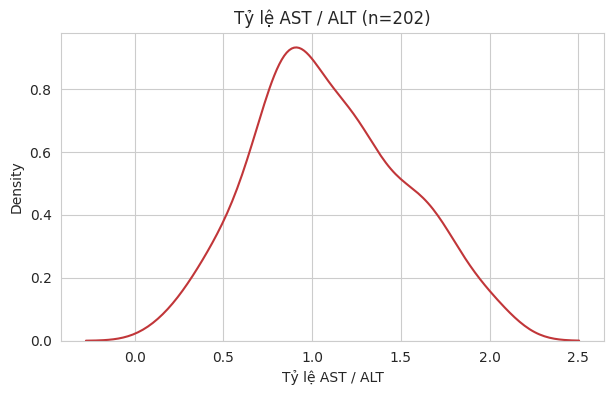

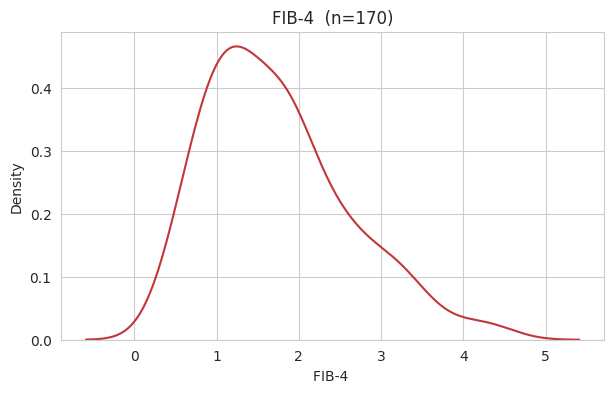

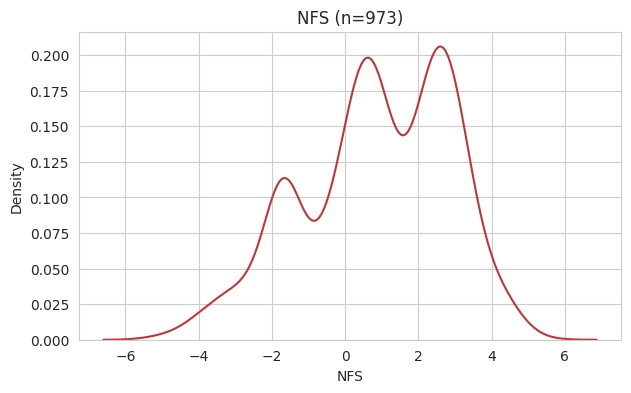

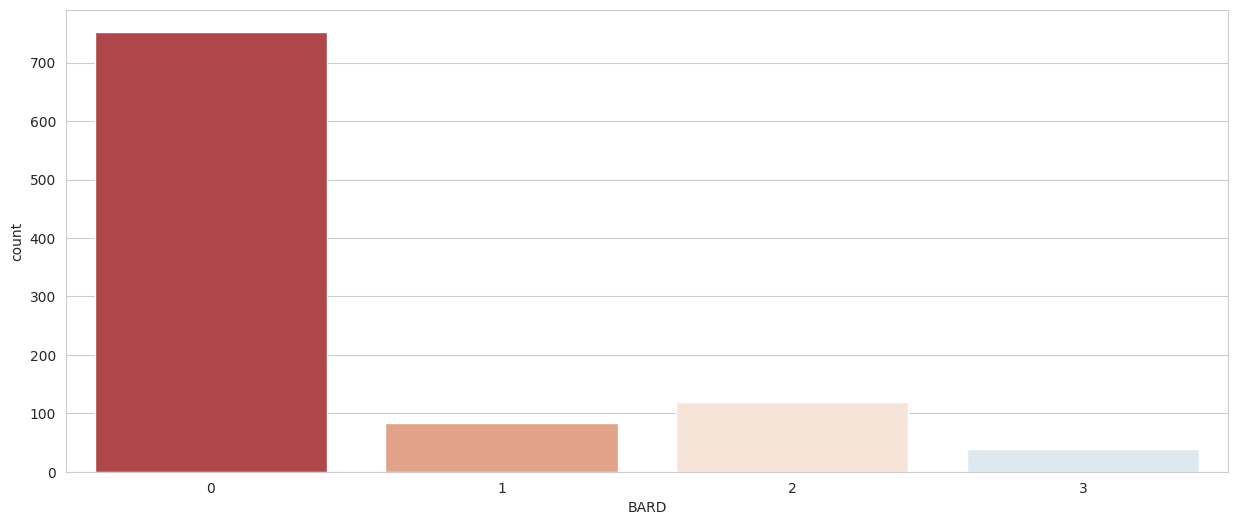

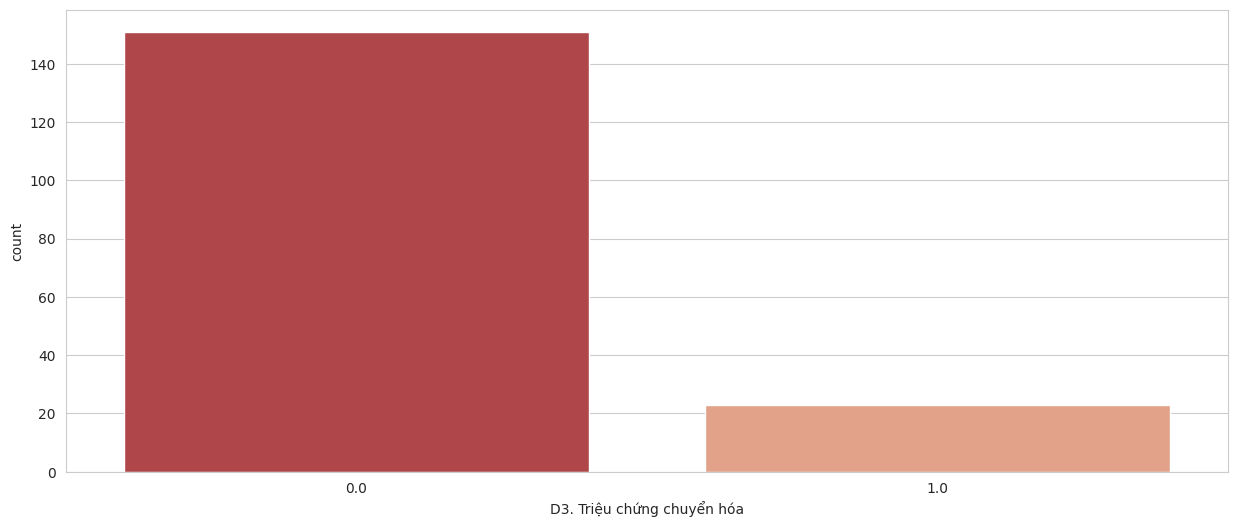

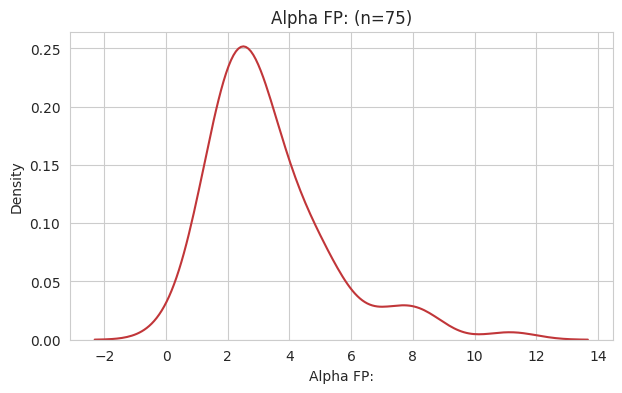

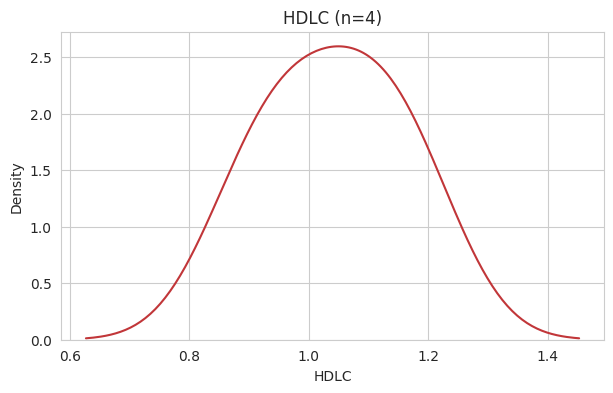

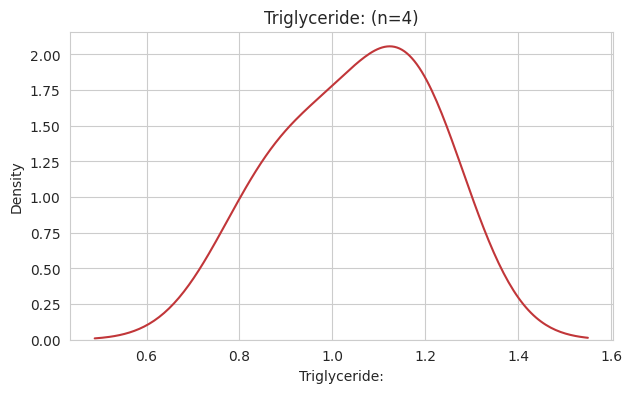

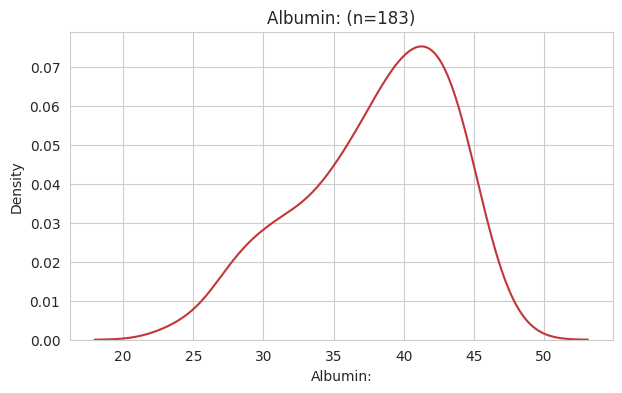

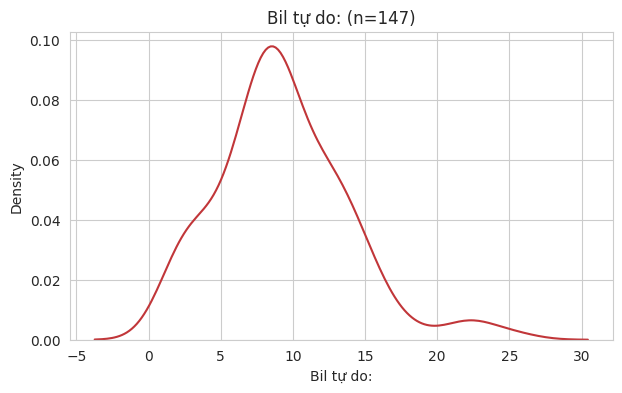

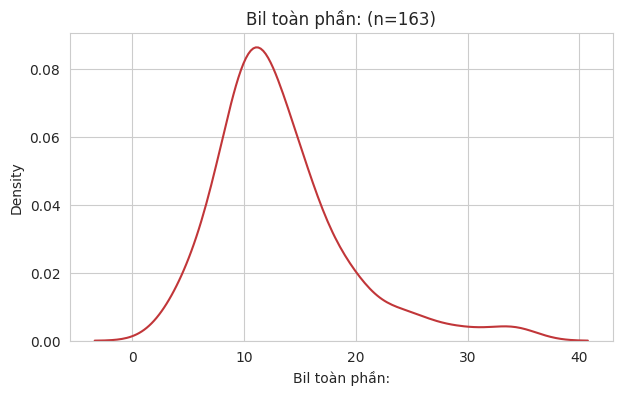

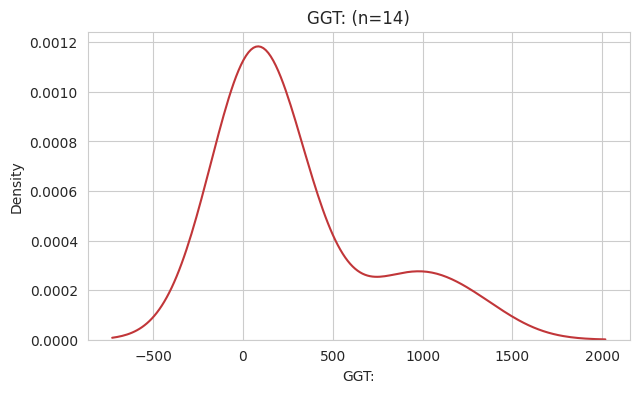

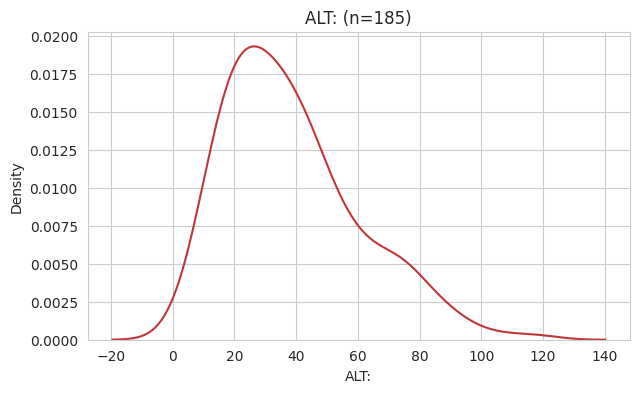

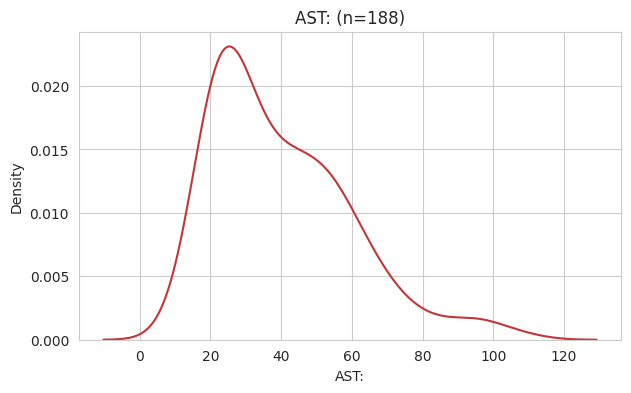

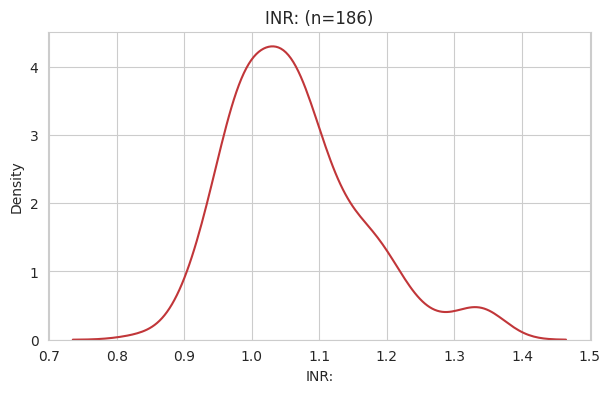

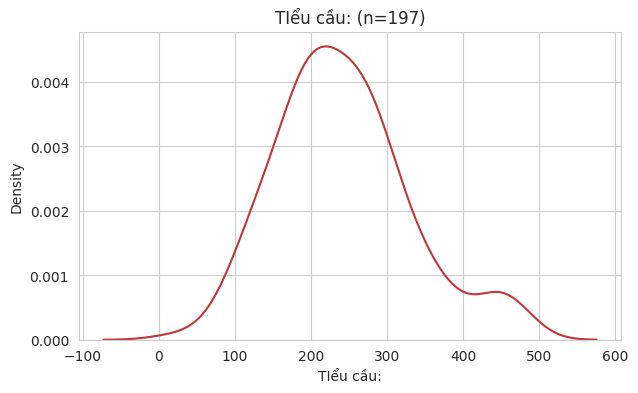

In [ ]:
distribution(clean_apri)
distribution(clean_ast_alt)
distribution(clean_fib4)
distribution(clean_nfs)
countplot(clean_bard)
countplot(clean_tcch)
distribution(clean_alphaFP)
distribution(clean_hdlc)
distribution(clean_tri)
distribution(clean_albumin)
distribution(clean_biltd)
distribution(clean_biltp)
distribution(clean_ggt)
distribution(clean_alt)
distribution(clean_ast)
distribution(clean_inr)
distribution(clean_tc)

In [ ]:
raw_age_gender = data[["A4. Giới tính:", "A3. Tuổi:"]]
clean_age_gender = raw_age_gender.dropna()

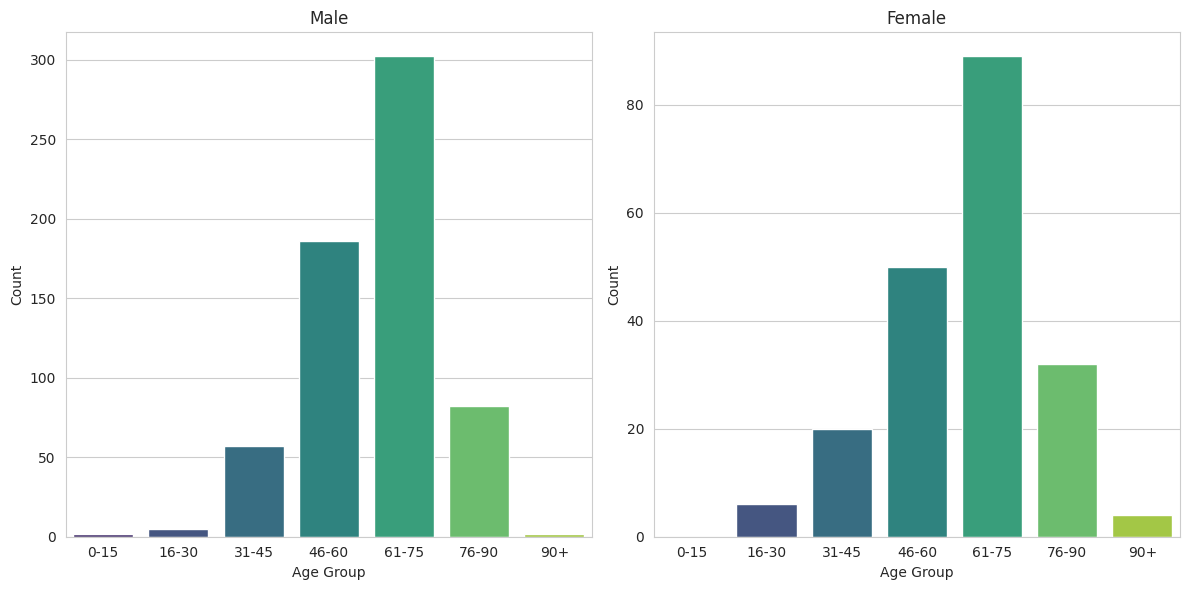

In [ ]:
age_bins = [0, 15, 30, 45, 60, 75, 90, float('inf')]
age_labels = ['0-15', '16-30', '31-45', '46-60', '61-75', '76-90', '90+']

clean_age_gender = clean_age_gender.copy()
clean_age_gender.loc[:, 'age_group'] = pd.cut(clean_age_gender['A3. Tuổi:'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=clean_age_gender[clean_age_gender['A4. Giới tính:'] == 'Nam'], x='age_group', order=age_labels, palette='viridis')
plt.title('Male')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=clean_age_gender[clean_age_gender['A4. Giới tính:'] == 'Nữ'], x='age_group', order=age_labels, palette='viridis')
plt.title('Female')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

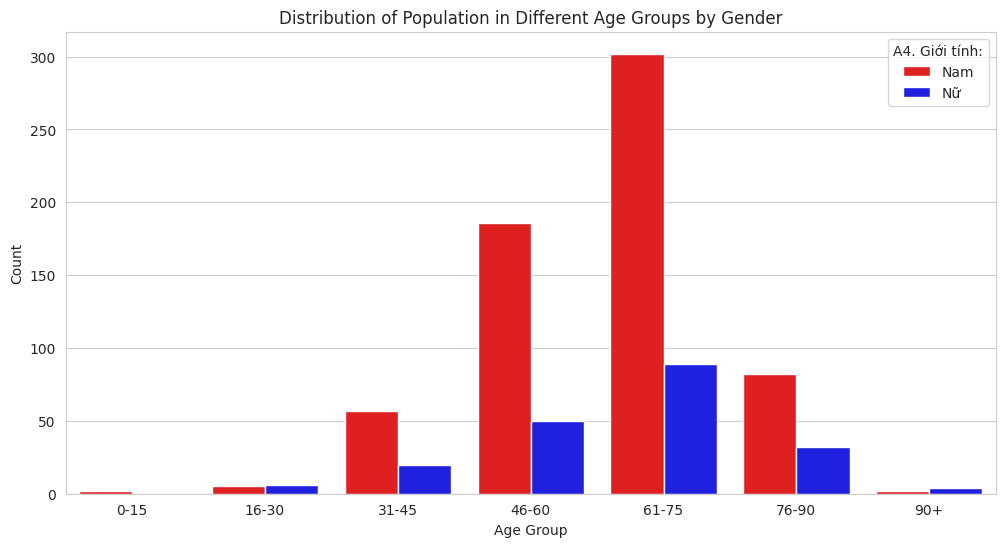

In [ ]:
age_bins = [0, 15, 30, 45, 60, 75, 90, float('inf')]
age_labels = ['0-15', '16-30', '31-45', '46-60', '61-75', '76-90', '90+']

clean_age_gender = clean_age_gender.copy()
clean_age_gender.loc[:, 'age_group'] = pd.cut(clean_age_gender['A3. Tuổi:'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(12, 6))
sns.countplot(data=clean_age_gender, x='age_group', hue='A4. Giới tính:', order=age_labels, palette=['red', 'blue'])
plt.title('Distribution of Population in Different Age Groups by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()